In [1]:
import scanpy as sc
import numpy as np
import gdown
import h5py
from mofapy2.run.entry_point import entry_point

# MOFA 2

## Load the dataset

In [2]:
gdown.download(
    'https://drive.google.com/uc?id=1mXikpKDZ6Nqh42kDHHbwVeMJWc1V9mdB',
    'gayoso2020-expressions.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1mXikpKDZ6Nqh42kDHHbwVeMJWc1V9mdB
To: /mnt/home/icb/anastasia.litinetskaya/multigrate/example/gayoso2020-expressions.h5ad
204MB [00:04, 45.5MB/s] 


'gayoso2020-expressions.h5ad'

In [3]:
scrna = sc.read('gayoso2020-expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 30293 × 4000
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [4]:
gdown.download(
    'https://drive.google.com/uc?id=1Y4wyzhaXrmW1anoByA5clmzrY6OurL4R',
    'gayoso2020-proteins.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1Y4wyzhaXrmW1anoByA5clmzrY6OurL4R
To: /mnt/home/icb/anastasia.litinetskaya/multigrate/example/gayoso2020-proteins.h5ad
57.4MB [00:01, 40.9MB/s]


'gayoso2020-proteins.h5ad'

In [5]:
cite = sc.read('gayoso2020-proteins.h5ad')
cite

AnnData object with n_obs × n_vars = 30293 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

## Prep data

In [6]:
scrna.obs.rename(columns={'cell_types': 'cell_type'}, inplace=True)
cite.obs.rename(columns={'cell_types': 'cell_type'}, inplace=True)

In [7]:
scrna1 = scrna[scrna.obs['batch_indices'] == 0]
scrna2 = scrna[scrna.obs['batch_indices'] == 1]

In [8]:
scrna1

View of AnnData object with n_obs × n_vars = 16845 × 4000
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_type', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [9]:
scrna2

View of AnnData object with n_obs × n_vars = 13448 × 4000
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_type', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [10]:
cite1 = cite[cite.obs['batch_indices'] == 0]
cite2 = cite[cite.obs['batch_indices'] == 1]

In [11]:
cite1

View of AnnData object with n_obs × n_vars = 16845 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_type', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [12]:
cite2

View of AnnData object with n_obs × n_vars = 13448 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_type', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

## Configure and train the model

In [13]:
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [14]:
ent.set_data_options(
    scale_groups = False, 
    scale_views = False
)

In [15]:
ent.set_data_matrix(
    [[scrna1.X.A, scrna2.X.A], [cite1.X, cite2.X]],
    views_names=['scRNA', 'scADT'],
    groups_names=['batch_1', 'batch_2']
)

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group2, ..., sampleN_groupG

Successfully loaded view='scRNA' group='batch_1' with N=16845 samples and D=4000 features...
Successfully loaded view='scRNA' group='batch_2' with N=13448 samples and D=4000 features...
Successfully loaded view='scADT' group='batch_1' with N=16845 samples and D=110 features...
Successfully loaded view='scADT' group='batch_2' with N=13448 samples and D=110 features...




In [16]:
ent.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (scRNA): gaussian
- View 1 (scADT): gaussian




In [17]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

Consider training the model with set drop_factor_threshold = -1 and prune them a posteriori


In [18]:
ent.build()

In [19]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -150719937.99 

Iteration 1: time=166.04, ELBO=24298809.87, deltaELBO=175018747.858 (116.12182847%), Factors=19
Iteration 2: time=155.67, ELBO=26864551.58, deltaELBO=2565741.717 (1.70232403%), Factors=18
Iteration 3: time=150.91, ELBO=27782364.10, deltaELBO=917812.520 (0.60895229%), Factors=17
Iteration 4: time=141.21, ELBO=28083818.58, deltaELBO=301454.475 (0.20000969%), Factors=16
Iteration 5: time=133.89, ELBO=28185323.66, deltaELBO=101505.086 (0.06734682%), Factors=15
Iteration 6: time=123.96, ELBO=28306113.53, deltaELBO=120789.864 (0.08014193%), Factors=14
Iteration 7: time=118.68, ELBO=28396661.26, deltaELBO=90547.730 (0.06007681%), Factors=13
Iteration 8: time=115.40, ELBO=28458692.31, deltaELBO=62031.056 (0.04115650%), Factors=13
Iteration 9: time=116.03, ELBO=28496150.92, deltaELBO=37458.608 (0.02485312%), Factors=13
Iteration 10: time=11

In [20]:
outfile = 'gayoso2020-mofa.hdf5'
ent.save(outfile)

Saving model in gayoso2020-mofa.hdf5...


## Save results as AnnData

In [21]:
f = h5py.File(outfile)

In [29]:
z = np.concatenate([v[:,:] for k, v in f['expectations']['Z'].items()], axis=1).T
z = sc.AnnData(z)

# to ensure correct order of cells
tmp = scrna1.concatenate(scrna2)

z.obs_names = tmp.obs_names
z.obs = tmp.obs

z

AnnData object with n_obs × n_vars = 30293 × 13
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_type', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'

In [30]:
z.write('../data/integrated/mofa/gayoso-mofa.h5ad')

## Remove old files

In [31]:
!rm 'gayoso2020-expressions.h5ad'
!rm 'gayoso2020-proteins.h5ad'
!rm 'gayoso2020-mofa.hdf5'

## Visualize results

In [33]:
sc.pp.neighbors(z)
sc.tl.umap(z)

In [36]:
z.obs['batch_indices'] = z.obs['batch_indices'].astype('category')

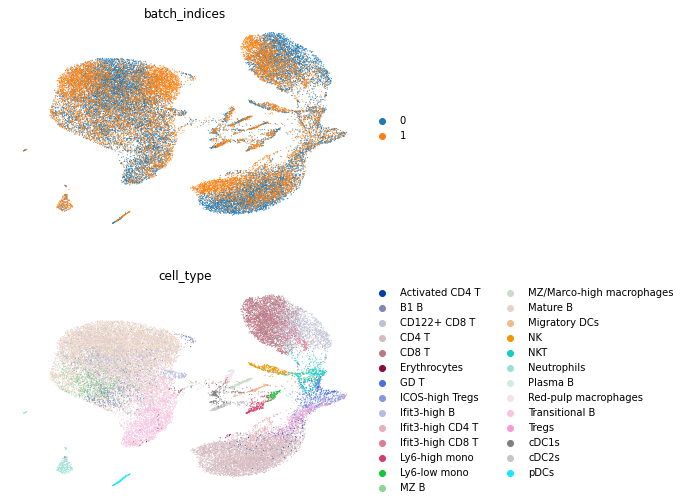

In [37]:
sc.pl.umap(z, color=['batch_indices', 'cell_type'], ncols=1, frameon=False)